In [ ]:
from google.colab import drive ##conectting drive to google colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Uploading and Understanding

In [ ]:
############################# importig all important liraries ###########################################

import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns  # data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
########### reading data from google drive #########################

data= pd.read_csv("/content/drive/MyDrive/final year project/mental-heath-in-tech-2016_20161114.csv")

In [ ]:
data.head(2) # shows two rows of the dataset

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never


In [ ]:
display(data.info())   # displays the type of questions asked durig survey

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

None

#Exploratory Data analysis

#### 1.Dealing with the missing values
###### select ONLY columns that have missing values <300 out of 1433 (missing less than 21% ) for further analysis

Are you self-employed?                                                                  0
How many employees does your company or organization have?                            287
Is your employer primarily a tech company/organization?                               287
Is your primary role within your company related to tech/IT?                         1170
Does your employer provide mental health benefits as part of healthcare coverage?     287
                                                                                     ... 
What US state or territory do you live in?                                            593
What country do you work in?                                                            0
What US state or territory do you work in?                                            582
Which of the following best describes your work position?                               0
Do you work remotely?                                                                   0
Length: 63

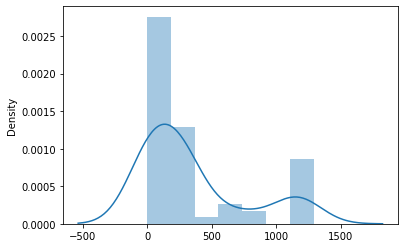

In [ ]:
print(data.isnull().sum()) # null values in every column
sns.distplot(data.isnull().sum())

In [ ]:
data_copy = data.copy()   # dummy data to restore origial dataset

In [ ]:
########################## Columns with Missing values > 300 ##########################
col_m = data.isnull().sum() > 300
cols_m= col_m[col_m==True]
#print(len(cols_m))
data_missing = data[cols_m.index]
#print(df_missing.shape)
data_missing.columns

Index(['Is your primary role within your company related to tech/IT?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?',
       'Do you know local or online resources to seek help for a mental health disorder?',
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
       'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?',
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
       'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?',
       'Do you believe your productivity is ever affected by a mental health

In [ ]:
## select ONLY columns that have missing values <300 out of 1433 (missing less than 21% ) for further analysis
col = data.isnull().sum() < 300
cols = col[col==True]
print(len(cols))
data1 = data[cols.index]
print(data1.shape)
# df1.columns

45
(1433, 45)


#### 4.2 Dealing with outliers

Text(0.5, 1.0, 'With outliers removed')

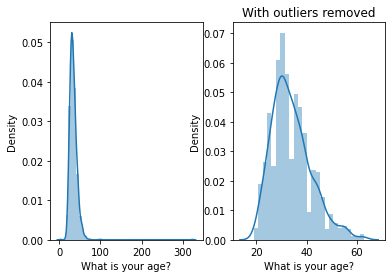

In [ ]:
## check demographic information
fig,axs = plt.subplots(1,2)
fig1 =sns.distplot(data["What is your age?"],ax = axs[0])

## remove outliers
data1["age"] = data["What is your age?"]
data2 = data1[(18 < data1["age"])  & (data1["age"] < 65)]
fig2 = sns.distplot(data2["What is your age?"], ax = axs[1])
fig2.set_title("With outliers removed")

#### 4.3 clean up messy data and recode

In [ ]:
mylist = ["Male","Man","man","male","MALE","female","Female", "F","M","f","m","woman","Woman"]
gender= data2["What is your gender?"].apply(lambda x: (x in mylist)) ## Return True/False
data2["What is your gender?"] = data2["What is your gender?"][gender]  ## Only retain True

print(data1.shape)

## Recoding
mapping =({"male":"Male",
           "Man":"Male",
           "man":"Male",
           "m":"Male",
           "M":"Male",
           "MALE":"Male",
           "Male":"Male",
           "woman":"Female",
           "Woman":"Female",
           "Female":"Female",
           "female":"Female",
           "f":"Female",
           "F":"Female"})

data2['gender'] = data2["What is your gender?"].map(mapping)
print(data2['gender'].value_counts())

(1433, 46)
Male      1024
Female     315
Name: gender, dtype: int64


### Statistical Analysis

In [ ]:
## Group items into sub groups for further analysis

## demographic
print("Demographic info")
print(data2.columns[39:43])
print()

## status
print("status")
print(data2.columns[[0,32,33,34,35,36,37,38]])
print()

##info about company
print("info about company")
print(data2.columns[[1,2]])
print()

## related to previous employers
print("Items related to previous employers")
print(data2.columns[15:25])
print()

## health insurance coverage
print("Mental health coverage&resources")
print(data2.columns[[3,4,5]])
print()

## Mental health conseuqences
print("Mental health consequences")
print(data2.columns[[6,7,8,9,10,11,28,29]])
print()

## Past experiences
print()
print("Past experiences")
print(data2.columns[[13,31]])

## Willing to talk
print()
print("Willing to talk about")
print(data2.columns[[26,27,30]])

Demographic info
Index(['What is your age?', 'What is your gender?',
       'What country do you live in?', 'What country do you work in?'],
      dtype='object')

status
Index(['Are you self-employed?',
       'Do you have a family history of mental illness?',
       'Have you had a mental health disorder in the past?',
       'Do you currently have a mental health disorder?',
       'Have you been diagnosed with a mental health condition by a medical professional?',
       'Have you ever sought treatment for a mental health issue from a mental health professional?',
       'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?',
       'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'],
      dtype='object')

info about company
Index(['How many employees does your company or organization have?', 'Is your employer primarily a tech company/organization?'], dty

In [ ]:
print(data2.shape)
print()
print(data2.iloc[:,2].value_counts(dropna = False))
print()
data2_f = data2[data2.iloc[:,2] == 1]
print(data2_f.shape)

(1424, 47)

1.0    878
NaN    285
0.0    261
Name: Is your employer primarily a tech company/organization?, dtype: int64

(878, 47)


In [ ]:
#filling NaN values
data2_f.fillna(method='ffill',inplace=True)
data2_f.fillna(value='Yes', limit=1,inplace=True)

In [ ]:
data2_f.head(2)


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What country do you work in?,Which of the following best describes your work position?,Do you work remotely?,age,gender
0,0,26-100,1.0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,No,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,United Kingdom,Back-end Developer,Sometimes,39,Male
1,0,6-25,1.0,No,Yes,Yes,Yes,Somewhat easy,No,No,...,Rarely,Sometimes,29,male,United States of America,United States of America,Back-end Developer|Front-end Developer,Never,29,Male


### Now analysing all the 47 real questions and what possible values they take.

In [ ]:
data2_f.drop(['What is your gender?'],axis=1,inplace=True) ### droping gender column, already replaced it with gender

In [ ]:
#listing all questions in real_features
real_features=(list(data2_f))
print(len(real_features))

46


In [ ]:
# showing possible answers to any questions for further analysis
for index,val in enumerate(real_features):
    p=data2_f[val].unique()
    print(index,val)
    print(p)
    print('\n')

0 Are you self-employed?
[0]


1 How many employees does your company or organization have?
['26-100' '6-25' 'More than 1000' '100-500' '500-1000' '1-5']


2 Is your employer primarily a tech company/organization?
[1.]


3 Does your employer provide mental health benefits as part of healthcare coverage?
['Not eligible for coverage / N/A' 'No' 'Yes' "I don't know"]


4 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
['No' 'Yes' "I don't know"]


5 Does your employer offer resources to learn more about mental health concerns and options for seeking help?
['No' 'Yes' "I don't know"]


6 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
["I don't know" 'Yes' 'No']


7 If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
['Very easy' 'Somewhat easy' 'Neither e

In [ ]:
############## encoding country name with numerical value ################
country=(data2_f[real_features[41]].unique())
num_rep=[]    #numeric representation with there index
alp_rep=[]    # name of country
#print(type(country))
for index,val in enumerate(country):
    num_rep.append(index)
    alp_rep.append(val)
print(len(num_rep),len(alp_rep))
data2_f[real_features[41]].replace(alp_rep, num_rep,inplace=True)  # Replacing country name with the index

42 42


In [ ]:
country=(data2_f[real_features[40]].unique())
num_rep=[]    #numeric representation with there index
alp_rep=[]    # name of country
#print(type(country))
for index,val in enumerate(country):
    num_rep.append(index)
    alp_rep.append(val)
print(len(num_rep),len(alp_rep))
data2_f[real_features[40]].replace(alp_rep, num_rep,inplace=True)

41 41


In [ ]:
# cosidering only threshold value for column "How many employees does your company or organization have?"
data2_f['How many employees does your company or organization have?'] = data2_f['How many employees does your company or organization have?'].replace('1-5', 5)
data2_f['How many employees does your company or organization have?'] = data2_f['How many employees does your company or organization have?'].replace('6-25',25)
data2_f['How many employees does your company or organization have?'] = data2_f['How many employees does your company or organization have?'].replace('26-100', 100)
data2_f['How many employees does your company or organization have?'] = data2_f['How many employees does your company or organization have?'].replace('100-500',500)
data2_f['How many employees does your company or organization have?'] = data2_f['How many employees does your company or organization have?'].replace('500-1000',1000)
data2_f['How many employees does your company or organization have?'] = data2_f['How many employees does your company or organization have?'].replace('More than 1000',5000)
data2_f['How many employees does your company or organization have?'] = data2_f['How many employees does your company or organization have?'].replace(np.nan,5)

###**Encoding**

In [ ]:
####################### encodig all categorical columns #########################
numeric = {real_features[3]:     {'Not eligible for coverage / N/A':0,'No':0, 'Yes':1, "I don't know":2},
                 real_features[4]:{'No':0, 'Yes':1, "I don't know":2},
                  real_features[5]:{'No':0, 'Yes':1, "I don't know":2},
                   real_features[6]:{"I don't know":2, 'Yes':1, 'No':0},
                    real_features[7]:{'Very easy':0 ,'Somewhat easy':1, 'Neither easy nor difficult':2,'Very difficult':-1,
 'Somewhat difficult':-2, "I don't know":2}, #### MODIFIED DIRECTLY
                real_features[8]:{'No':0, 'Maybe':2, 'Yes':1},
                real_features[9]:{'No':0, 'Maybe':2, 'Yes':1},
                 real_features[10]:{'No':0, 'Maybe':2, 'Yes':1},
                 real_features[11]:{'No':0, 'Maybe':2, 'Yes':1},
                 real_features[12]:{"I don't know":2, 'Yes':1, 'No':0},
                 real_features[13]:{'No':0, 'Yes':1},
                 real_features[15]:{'No, none did':0, 'Yes, they all did':1, "I don't know":2, 'Some did':3},
                 real_features[16]:{'N/A (not currently aware)':0, 'I was aware of some':1,
                                    'Yes, I was aware of all of them':1, 'No, I only became aware later':0},  ### MODIFIED DIRECTLY
                real_features[17]:{"I don't know":2, 'None did':0, 'Some did':3,'Yes, they all did':1},
                real_features[18]:{'None did':0, 'Some did':3, 'Yes, they all did':1},
                real_features[19]:{"I don't know":2, 'Yes, always':1, 'Sometimes':3, 'No':0},
                real_features[20]:{'Some of them':3, 'None of them':0, "I don't know":2, 'Yes, all of them':1},
                real_features[21]:{'None of them':0, 'Some of them':3, 'Yes, all of them':1},
                real_features[22]:{'Some of my previous employers':3, 'No, at none of my previous employers':0,
 'Yes, at all of my previous employers':1},
                real_features[23]:{'Some of my previous employers':3, "I don't know":2, 'No, at none of my previous employers':0,
 'Yes, at all of my previous employers':1},
                real_features[24]:{"I don't know":2, 'Some did':3, 'None did':0, 'Yes, they all did':1},
                real_features[25]:{'None of them':0, 'Some of them':3, 'Yes, all of them':1},
                real_features[26]:{'Maybe':2, 'Yes':1, 'No':0},
           real_features[27]:{'Maybe':2, 'Yes':1, 'No':0},
                real_features[28]:{'Maybe':2, "No, I don't think it would":0, 'Yes, I think it would':1,
 'No, it has not':0, 'Yes, it has':1},  ### MODIFIED DIRECTLY
                real_features[29]:{"No, I don't think they would":0, 'Maybe':2, 'Yes, they do':1,'Yes, I think they would':1, 'No, they do not':0},  ## MODIFIED DIRECTLY
                real_features[30]:{'Somewhat open':1, 'Not applicable to me (I do not have a mental illness)':4,
 'Very open':2, 'Not open at all':-2 ,'Neutral':0, 'Somewhat not open':-1}, ### MODIFIED DIRECTLY
                real_features[31]:{'No':0, 'Maybe/Not sure':2, 'Yes, I experienced':1, 'Yes, I observed':1},
                real_features[32]:{'No':0, 'Yes':1, "I don't know":2},
                real_features[33]:{'Yes':1, 'Maybe':2, 'No':0},
                real_features[34]:{'Yes':1, 'Maybe':2, 'No':0},
                real_features[35]:{'Yes':1, 'No':0},
                real_features[37]:{'Not applicable to me':4, 'Rarely':0, 'Sometimes':3, 'Never':0, 'Often':1},
                real_features[38]:{'Not applicable to me':4, 'Sometimes':3, 'Often':1, 'Rarely':0, 'Never':0},
                real_features[45]:{'Male':1, 'Female':0, 'Genderqueer/Other':2},
           real_features[43]:{'Sometimes':3, 'Never':0, 'Always':1}
          }

In [ ]:
countries = data['What country do you work in?'].sort_values().unique()
countries

array(['Afghanistan', 'Argentina', 'Australia', 'Austria', 'Bangladesh',
       'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Brunei',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Ecuador', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Guatemala', 'Hungary', 'India',
       'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Other',
       'Pakistan', 'Poland', 'Romania', 'Russia', 'Serbia', 'Slovakia',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Arab Emirates', 'United Kingdom',
       'United States of America', 'Venezuela', 'Vietnam'], dtype=object)

In [ ]:
data2_f['Is your employer primarily a tech company/organization?'] = data2_f['Is your employer primarily a tech company/organization?'].fillna(0).astype(int)
print(data2_f)
print(data2_f.dtypes)

      Are you self-employed?  \
0                          0   
1                          0   
2                          0   
5                          0   
6                          0   
...                      ...   
1425                       0   
1426                       0   
1427                       0   
1430                       0   
1432                       0   

      How many employees does your company or organization have?  \
0                                                   100            
1                                                    25            
2                                                    25            
5                                                  5000            
6                                                   100            
...                                                 ...            
1425                                                500            
1426                                                500            
142

In [ ]:
data2_f.replace(numeric, inplace=True)
data2_f.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,...,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What country do you live in?,What country do you work in?,Which of the following best describes your work position?,Do you work remotely?,age,gender
0,0,100,1,0,0,0,2,0,0,0,...,0,4,4,39,0,0,Back-end Developer,3,39,1
1,0,25,1,0,1,1,1,1,0,0,...,1,0,3,29,1,1,Back-end Developer|Front-end Developer,0,29,1
2,0,25,1,0,0,0,2,2,2,0,...,1,4,4,38,0,0,Back-end Developer,1,38,1
5,0,5000,1,1,0,1,1,1,1,1,...,1,4,1,42,0,0,DevOps/SysAdmin|Support|Back-end Developer|Fro...,3,42,1
6,0,100,1,2,0,0,2,1,0,0,...,0,4,4,30,1,1,Back-end Developer,3,30,1


In [ ]:
work_pos_s = data2_f['Which of the following best describes your work position?']
data4_f = data2_f.copy()
data4_f = data4_f.drop(["Which of the following best describes your work position?"],axis=1)
data4_f.head(1)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,...,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What country do you live in?,What country do you work in?,Do you work remotely?,age,gender
0,0,100,1,0,0,0,2,0,0,0,...,1,0,4,4,39,0,0,3,39,1


In [ ]:
data3_f = data4_f.copy()
# renamig columns to ease up the work
data_reformed = {
    "Are you self-employed?":"self_employed?",
    "How many employees does your company or organization have?":"num_employees",
    "Does your employer provide mental health benefits as part of healthcare coverage?":"mh_benefits",
    "Do you know the options for mental health care available under your employer-provided coverage?":"mh_know_options",
    "Is your employer primarily a tech company/organization?":"is_tech",
    "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?":"mh_discuss",
    "Does your employer offer resources to learn more about mental health concerns and options for seeking help?":"mh_learn",
    "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?":"mh_anonyimity",
    "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:":"mh_leave",
    "Do you think that discussing a mental health disorder with your employer would have negative consequences?":"mh_neg_consequece",
    "Do you think that discussing a physical health issue with your employer would have negative consequences?":"ph_neg_consequece",
    "Would you feel comfortable discussing a mental health disorder with your coworkers?":"comf_coworker",
    "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?":"comf_supervisor",
    "Do you feel that your employer takes mental health as seriously as physical health?":"mh_serious",
    "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?":"mh_others_neg_consequece",
    "Do you have previous employers?":"prev_employers",
    "Have your previous employers provided mental health benefits?":"mh_benefits_prev_employers",
    "Were you aware of the options for mental health care provided by your previous employers?":"mh_know_options",
    "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?":"prev_employers_discuss",
    "Did your previous employers provide resources to learn more about mental health issues and how to seek help?":"pep_learn",
    "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?":"pep_anon",
    "Do you think that discussing a mental health disorder with previous employers would have negative consequences?":"pep_mh_ncsq",
    "Do you think that discussing a physical health issue with previous employers would have negative consequences?":"pep_ph_ncsq",
    "Would you have been willing to discuss a mental health issue with your previous co-workers?":"pep_comf_cw",
    "Would you have been willing to discuss a mental health issue with your direct supervisor(s)?":"pep_comf_sup",
    "Did you feel that your previous employers took mental health as seriously as physical health?":"pep_serious",
    "Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?":"pep_others_ncsq",
    "Would you be willing to bring up a physical health issue with a potential employer in an interview?":"fep_ph_willing",
    "Would you bring up a mental health issue with a potential employer in an interview?":"fep_mh_willing",
    "Do you feel that being identified as a person with a mental health issue would hurt your career?":"hurt_career",
    "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?":"cw_view_neg",
    "How willing would you be to share with friends and family that you have a mental illness?":"comf_ff",
    "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?":"neg_response",
    "Do you have a family history of mental illness?":"mh_fam_hist",
    "Have you had a mental health disorder in the past?":"mh_hist",
    "Do you currently have a mental health disorder?":"mh_cur",
    "What country do you live in?":"home_country",
    "Have you been diagnosed with a mental health condition by a medical professional?":"mh_diag_pro",
    "Have you ever sought treatment for a mental health issue from a mental health professional?":"sought_treat",
    "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?":"work_affect_effect",
    "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?":"work_affect_ineffect",
    #"What is your age?":"age",
    "Which of the following best describes your work position?":"position",
    "What is your gender?":"gender",
    "What country do you work in?":"work_country",
    "Do you work remotely?":"work_remote"
}

data3_f=data3_f.rename(columns=data_reformed)

In [ ]:
data3_f.head()

,self_employed?,num_employees,is_tech,mh_benefits,mh_discuss,mh_learn,mh_anonyimity,mh_leave,mh_neg_consequece,ph_neg_consequece,...,mh_diag_pro,sought_treat,work_affect_effect,work_affect_ineffect,What is your age?,home_country,work_country,work_remote,age,gender
0,0,100,1,0,0,0,2,0,0,0,...,1,0,4,4,39,0,0,3,39,1
1,0,25,1,0,1,1,1,1,0,0,...,1,1,0,3,29,1,1,0,29,1
2,0,25,1,0,0,0,2,2,2,0,...,0,1,4,4,38,0,0,1,38,1
5,0,5000,1,1,0,1,1,1,1,1,...,0,1,4,1,42,0,0,3,42,1
6,0,100,1,2,0,0,2,1,0,0,...,0,0,4,4,30,1,1,3,30,1


In [ ]:
data3_f = data3_f.drop(["What is your age?"],axis=1)

# Feature Selection
Trying different approaches and comparing results:

Correlation;
Chi-2;
RFE;
SMLR;
ReliefF
## Correlation
Correlation is a simple approach to find linear dependence between features.

If correlation == |1| - two features have linear dependence; If correlation == 0 - two features have not linear dependence.

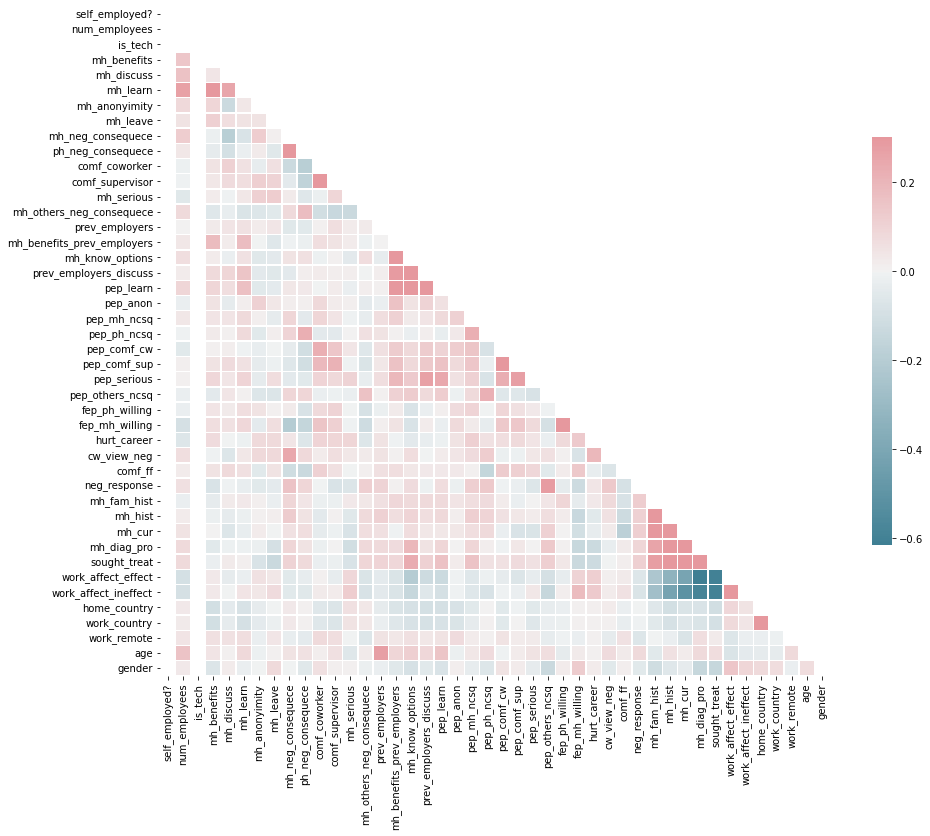

In [ ]:
corr =  data3_f.corr(method ='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
#from sklearn.model_selection import train_test_split`


In [ ]:
#target=data3_f['sought_treat']
#data3_f.drop(['sought_treat'],axis=1,inplace=True)

In [ ]:
data3_f.dtypes

self_employed?                int64
num_employees                 int64
is_tech                       int64
mh_benefits                   int64
mh_discuss                    int64
mh_learn                      int64
mh_anonyimity                 int64
mh_leave                      int64
mh_neg_consequece             int64
ph_neg_consequece             int64
comf_coworker                 int64
comf_supervisor               int64
mh_serious                    int64
mh_others_neg_consequece      int64
prev_employers                int64
mh_benefits_prev_employers    int64
mh_know_options               int64
prev_employers_discuss        int64
pep_learn                     int64
pep_anon                      int64
pep_mh_ncsq                   int64
pep_ph_ncsq                   int64
pep_comf_cw                   int64
pep_comf_sup                  int64
pep_serious                   int64
pep_others_ncsq               int64
fep_ph_willing                int64
fep_mh_willing              

In [ ]:
#X= data3_f

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.3, random_state=0)

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.classification import *

In [ ]:
exp = setup(data=data3_f,target="sought_treat")

,Description,Value
0,session_id,1853
1,Target,sought_treat
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(878, 44)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,40
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8811,0.9402,0.8845,0.9076,0.8935,0.7584,0.7637,0.406
lightgbm,Light Gradient Boosting Machine,0.8747,0.9308,0.8701,0.9067,0.8859,0.7467,0.7518,0.103
ridge,Ridge Classifier,0.8682,0.0000,0.8645,0.9010,0.8794,0.7339,0.7401,0.029
lda,Linear Discriminant Analysis,0.8666,0.9384,0.8616,0.9008,0.8778,0.7307,0.7371,0.051
et,Extra Trees Classifier,0.8650,0.9445,0.8847,0.8819,0.8809,0.7243,0.7299,0.523
rf,Random Forest Classifier,0.8617,0.9423,0.8876,0.8739,0.8784,0.7174,0.7228,0.693
lr,Logistic Regression,0.8502,0.9278,0.8645,0.8726,0.8660,0.6954,0.7006,0.808
ada,Ada Boost Classifier,0.8502,0.9318,0.8673,0.8722,0.8659,0.6952,0.7031,0.277
nb,Naive Bayes,0.8486,0.9122,0.8674,0.8693,0.8660,0.6914,0.6962,0.032
svm,SVM - Linear Kernel,0.8176,0.0000,0.8242,0.8679,0.8345,0.6285,0.6522,0.044


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1853, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
RandomForest_Classifier =create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8710,0.9418,0.8571,0.9091,0.8824,0.7398,0.7413
1,0.8710,0.9476,0.8571,0.9091,0.8824,0.7398,0.7413
2,0.8710,0.9270,0.9143,0.8649,0.8889,0.7353,0.7369
3,0.7419,0.8974,0.7429,0.7879,0.7647,0.4795,0.4806
4,0.8525,0.9698,0.9429,0.8250,0.8800,0.6907,0.7011
5,0.8525,0.9049,0.9429,0.8250,0.8800,0.6907,0.7011
6,0.8852,0.9571,0.9714,0.8500,0.9067,0.7594,0.7709
7,0.8361,0.9406,0.8824,0.8333,0.8571,0.6652,0.6667
8,0.9672,0.9793,0.9706,0.9706,0.9706,0.9336,0.9336


###Model Tuning

In [ ]:
tuned_rf =tune_model(RandomForest_Classifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8548,0.9439,0.8571,0.8824,0.8696,0.7060,0.7064
1,0.9032,0.9534,0.8571,0.9677,0.9091,0.8065,0.8133
2,0.8871,0.9238,0.9143,0.8889,0.9014,0.7694,0.7698
3,0.7581,0.8984,0.7429,0.8125,0.7761,0.5141,0.5166
4,0.9016,0.9692,0.9714,0.8718,0.9189,0.7948,0.8024
5,0.8689,0.9077,0.9429,0.8462,0.8919,0.7265,0.7333
6,0.8852,0.9560,0.9714,0.8500,0.9067,0.7594,0.7709
7,0.8197,0.9412,0.8824,0.8108,0.8451,0.6303,0.6335
8,0.9836,0.9869,0.9706,1.0000,0.9851,0.9669,0.9674


In [ ]:
ExtraTrees_Classifier =create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8710,0.9444,0.8571,0.9091,0.8824,0.7398,0.7413
1,0.8387,0.9519,0.8000,0.9032,0.8485,0.6774,0.6831
2,0.8871,0.9302,0.9143,0.8889,0.9014,0.7694,0.7698
3,0.7742,0.9095,0.7714,0.8182,0.7941,0.5446,0.5458
4,0.8689,0.9676,0.9714,0.8293,0.8947,0.7237,0.7397
5,0.8525,0.9115,0.9429,0.8250,0.8800,0.6907,0.7011
6,0.8689,0.9588,0.9429,0.8462,0.8919,0.7265,0.7333
7,0.8361,0.9357,0.8824,0.8333,0.8571,0.6652,0.6667
8,0.9672,0.9869,0.9412,1.0000,0.9697,0.9341,0.9361


In [ ]:
tuned_ridge =tune_model(ExtraTrees_Classifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8548,0.9481,0.8571,0.8824,0.8696,0.7060,0.7064
1,0.9032,0.9651,0.8571,0.9677,0.9091,0.8065,0.8133
2,0.8871,0.9280,0.9143,0.8889,0.9014,0.7694,0.7698
3,0.7581,0.8984,0.7429,0.8125,0.7761,0.5141,0.5166
4,0.9016,0.9626,0.9714,0.8718,0.9189,0.7948,0.8024
5,0.8689,0.9132,0.9429,0.8462,0.8919,0.7265,0.7333
6,0.8852,0.9495,0.9714,0.8500,0.9067,0.7594,0.7709
7,0.8197,0.9434,0.8824,0.8108,0.8451,0.6303,0.6335
8,0.9836,0.9837,0.9706,1.0000,0.9851,0.9669,0.9674


###**Predicting result**

In [ ]:
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8826,0.9523,0.8974,0.9032,0.9003,0.7575,0.7575


,home_country,work_country,age,self_employed?_0,num_employees_100,num_employees_1000,num_employees_25,num_employees_5,num_employees_500,num_employees_5000,...,work_affect_ineffect_1,work_affect_ineffect_3,work_affect_ineffect_4,work_remote_0,work_remote_1,work_remote_3,gender_1,sought_treat,Label,Score
0,2.0,2.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0.8411
1,2.0,2.0,35.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,1,0.8647
2,1.0,1.0,36.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0.8859
3,1.0,1.0,28.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,0.6861
4,1.0,1.0,34.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.8205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1.0,1.0,29.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1,0.8414
260,4.0,4.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.5001
261,1.0,1.0,28.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0.7978
262,5.0,5.0,39.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0,1,0.6009


###**Finalizing Model**

In [ ]:
final_model = finalize_model(tuned_rf)
print(final_model)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=1853, verbose=0,
                       warm_start=False)


###**Saving Model**

In [ ]:
save_model(RandomForest_Classifier, model_name='rf-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='sought_treat',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
       

In [ ]:
model = load_model('rf-model')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
cols=['self_employed?','num_employees', 'is_tech','mh_benefits','mh_discuss','mh_learn','mh_anonyimity','mh_leave','mh_neg_consequece','ph_neg_consequece',
      'comf_coworker','comf_supervisor','mh_serious','mh_others_neg_consequece','prev_employers','mh_benefits_prev_employers', 'mh_know_options',
       'prev_employers_discuss','pep_learn','pep_anon', 'pep_mh_ncsq','pep_ph_ncsq', 'pep_comf_cw','pep_comf_sup', 'pep_serious','pep_others_ncsq',
       'fep_ph_willing','fep_mh_willing', 'hurt_career','cw_view_neg','comf_ff','neg_response', 'mh_fam_hist','mh_hist','mh_cur','mh_diag_pro','sought_treat',
       'work_affect_effect','work_affect_ineffect', 'home_country','work_country','work_remote', 'age','gender']

In [ ]:
list(data3_f.iloc[2])

In [ ]:
records =[[0,25,1,0,0,0,2,2,2,0,2,2,2,0,1,0,0,0,3,2,2,3,3,2,2,3,1,1,2,2,1,2,0,2,0,0,1,4,4,0,0,1,38,0]]

In [ ]:
new_data = pd.DataFrame(data=records, columns=cols)

###Prediction on unseen data

In [ ]:
unseen_predictions=predict_model(final_model, data=data3_f.tail(5))#data3_f.tail(5)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8,1.0,1.0,0.75,0.8571,0.5455,0.6124


,self_employed?,num_employees,is_tech,mh_benefits,mh_discuss,mh_learn,mh_anonyimity,mh_leave,mh_neg_consequece,ph_neg_consequece,...,sought_treat,work_affect_effect,work_affect_ineffect,home_country,work_country,work_remote,age,gender,Label,Score
1425,0,500,1,1,1,1,1,1,0,0,...,0,0,0,2,2,3,24,1,0,0.5149
1426,0,500,1,2,0,2,2,1,2,0,...,1,0,1,2,2,3,26,0,1,0.9236
1427,0,1000,1,1,0,0,1,1,0,0,...,1,0,1,1,1,1,38,0,1,0.9391
1430,0,500,1,1,1,1,2,-2,2,2,...,1,0,3,1,1,3,52,1,1,0.9179
1432,0,500,1,1,0,0,2,-1,2,0,...,0,4,1,2,2,3,25,1,1,0.6332


In [ ]:
results=pull()

In [ ]:
from pycaret.utils import check_metric

In [ ]:
check_metric(unseen_predictions['sought_treat'], unseen_predictions['Label'].astype(int), 'Accuracy')

0.8

In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…